In [2]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data

In [3]:
DF_importance=pd.read_csv('../global_results/egemaps_random_forest_default_silero_importance.csv',index_col=0)
DF_performance=pd.read_csv('../global_results/egemaps_random_forest_default_silero_performance.csv',index_col=0)
DF_relevant_features=pd.read_csv('../global_results/egemaps_random_forest_default_silero_relevant_features.csv',index_col=0)

In [4]:
DF_performance

,index,all,O,C,E,A,N,audio_type,experiment
0,r2,0.128289,0.150932,0.105634,0.130415,0.083624,0.172148,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
1,r,0.358175,0.388500,0.325014,0.361130,0.289179,0.414908,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
2,MAE,0.108350,0.105933,0.117133,0.111130,0.098142,0.108913,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
3,MSE,0.018464,0.017659,0.021493,0.019234,0.015308,0.018593,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
4,RMSE,0.135883,0.132888,0.146604,0.138687,0.123727,0.136354,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
...,...,...,...,...,...,...,...,...,...
0,r2,0.248556,0.280536,0.248178,0.276645,0.171334,0.291181,all_audio,all_audio_complete_set
1,r,0.498554,0.529657,0.498175,0.525970,0.413925,0.539612,all_audio,all_audio_complete_set
2,MAE,0.099460,0.095521,0.107435,0.100670,0.091265,0.100790,all_audio,all_audio_complete_set
3,MSE,0.015753,0.014794,0.018221,0.015837,0.013479,0.015920,all_audio,all_audio_complete_set


Filtro los experimentos y me quedo con yamnet_music_0.2, yamnet_no_music_0.2, all_audio_complete_set

In [5]:
DF_performance=DF_performance[(DF_performance['audio_type'].isin(['silero_speech','silero_no_speech','all_audio'])) & (DF_performance['experiment'].isin(['yamnet_music_0.2','yamnet_no_music_0.2','all_audio_complete_set','yamnet_no_music_20+speech_rate_0.5','yamnet_no_music_20+speech_rate_0.6','yamnet_no_music_20+speech_rate_0.7','yamnet_no_music_20+speech_rate_0.8','yamnet_no_music_20+speech_rate_0.9']))]

# Performance

## R²

In [6]:
r2=DF_performance[DF_performance['index']=='r2'].drop(columns='index')

r2_all=r2.loc[:,~r2.columns.isin(['O','C','E','A','N'])]
r2_O=r2.loc[:,~r2.columns.isin(['all','C','E','A','N'])]
r2_C=r2.loc[:,~r2.columns.isin(['O','all','E','A','N'])]
r2_E=r2.loc[:,~r2.columns.isin(['O','C','all','A','N'])]
r2_A=r2.loc[:,~r2.columns.isin(['O','C','E','all','N'])]
r2_N=r2.loc[:,~r2.columns.isin(['O','C','E','A','all'])]

### All

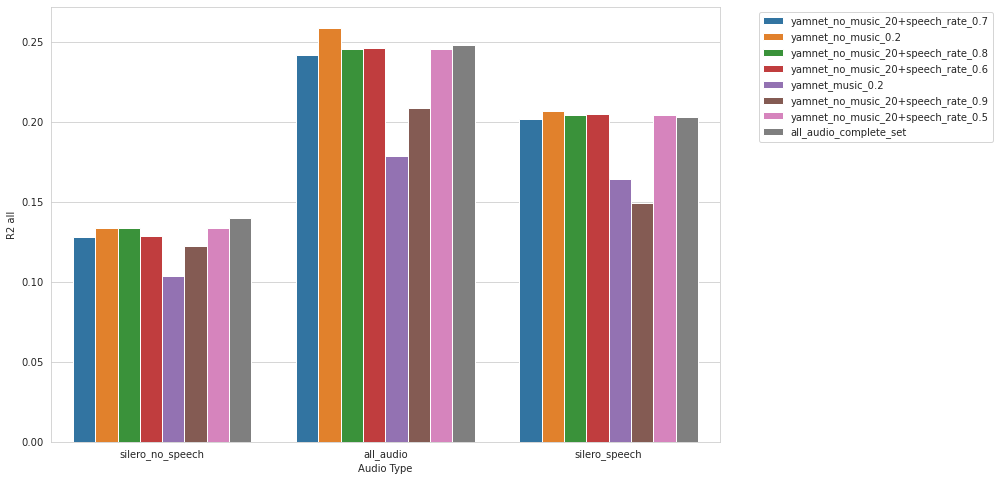

In [7]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r2_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

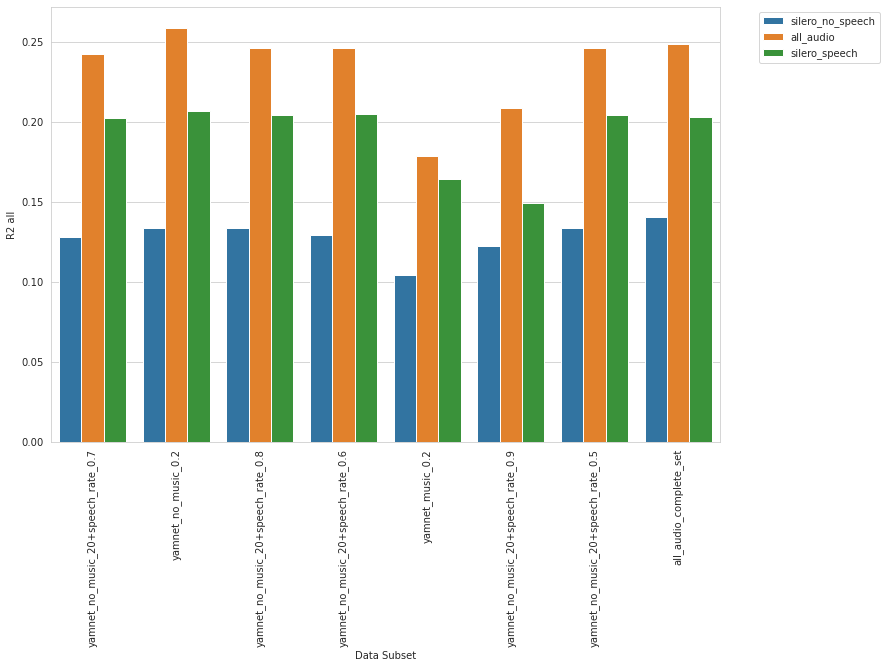

In [8]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="all", hue="audio_type", data=r2_all,capsize=.1,errwidth=1.4,)
ax.set(xlabel='Data Subset', ylabel='R2 all',)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Openness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Openness')]

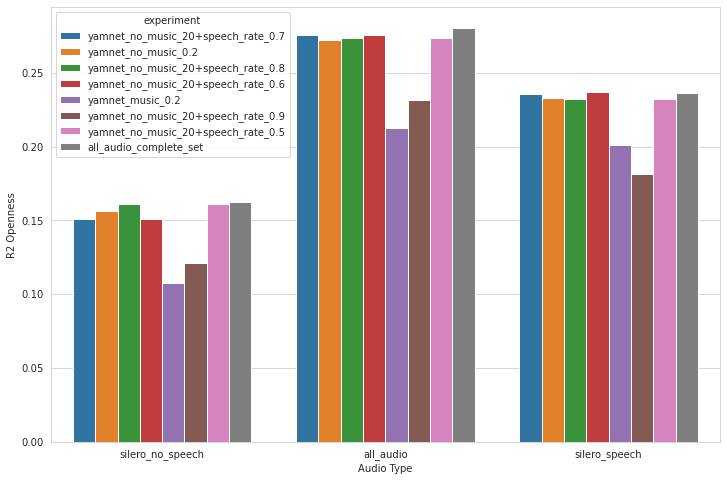

In [9]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r2_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Openness')

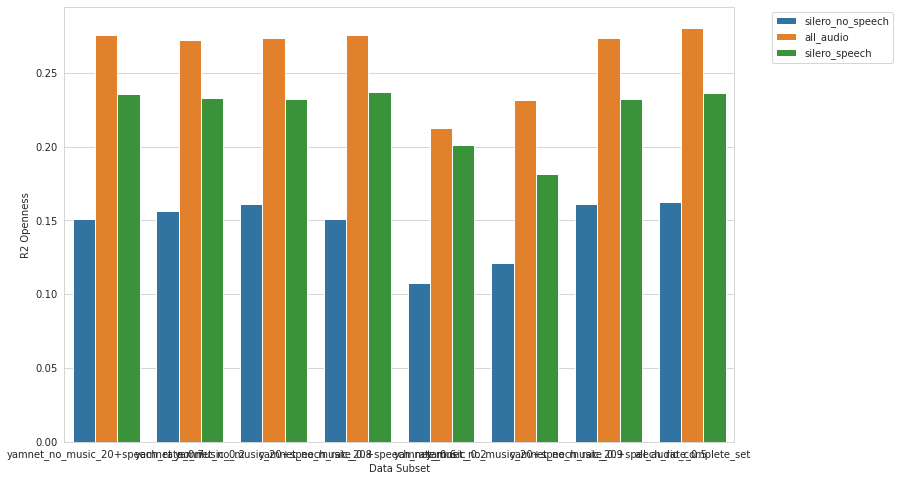

In [10]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="O", hue="audio_type", data=r2_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data Subset', ylabel='R2 Openness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Conscienciousness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Conscienciousness')]

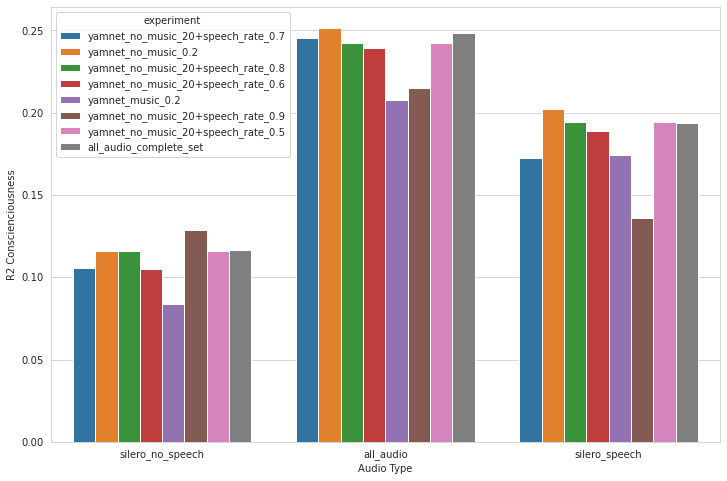

In [11]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r2_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Conscienciousness')

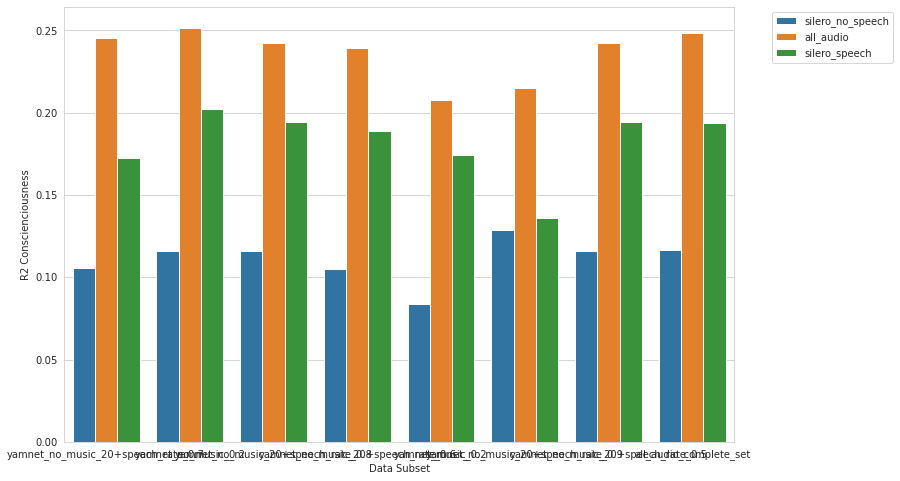

In [12]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="C", hue="audio_type", data=r2_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data Subset', ylabel='R2 Conscienciousness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Extraversion

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Extraversion')]

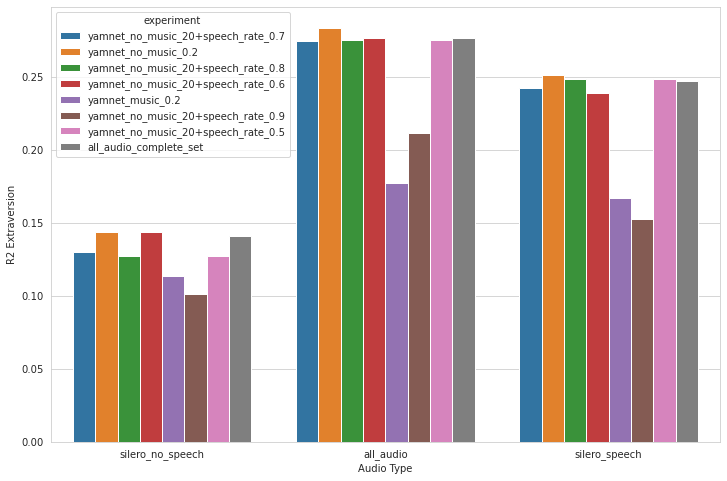

In [13]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r2_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Extraversion')

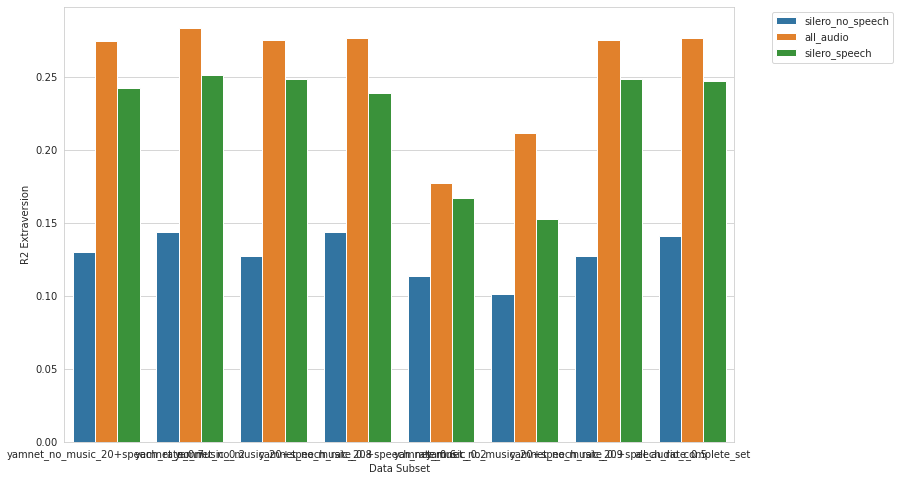

In [14]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="E", hue="audio_type", data=r2_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data Subset', ylabel='R2 Extraversion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Agreeableness

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Agreeableness')]

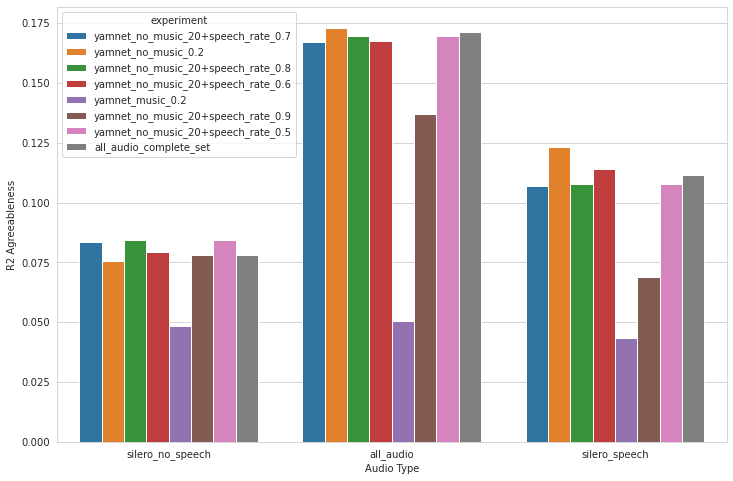

In [15]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r2_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Agreeableness')

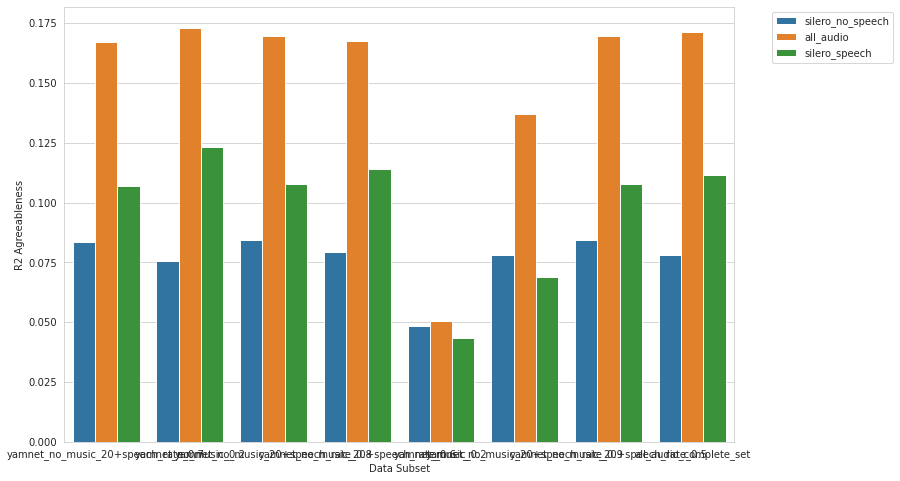

In [16]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="A", hue="audio_type", data=r2_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data Subset', ylabel='R2 Agreeableness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Neuroticism

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R2 Neuroticism')]

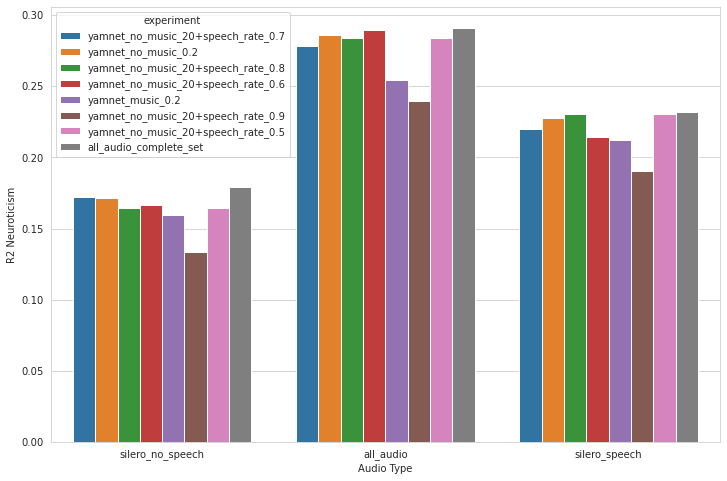

In [17]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r2_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Neuroticism')

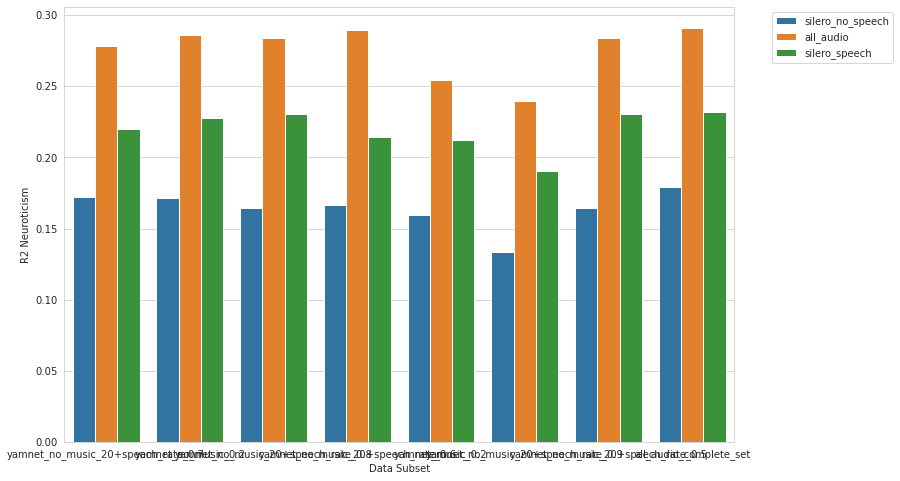

In [18]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="N", hue="audio_type", data=r2_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data Subset', ylabel='R2 Neuroticism')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## R

In [19]:
r=DF_performance[DF_performance['index']=='r'].drop(columns='index')

r_all=r.loc[:,~r.columns.isin(['O','C','E','A','N'])]
r_O=r.loc[:,~r.columns.isin(['all','C','E','A','N'])]
r_C=r.loc[:,~r.columns.isin(['O','all','E','A','N'])]
r_E=r.loc[:,~r.columns.isin(['O','C','all','A','N'])]
r_A=r.loc[:,~r.columns.isin(['O','C','E','all','N'])]
r_N=r.loc[:,~r.columns.isin(['O','C','E','A','all'])]

### All

[Text(0.5, 0, 'Audio Type'), Text(0, 0.5, 'R all')]

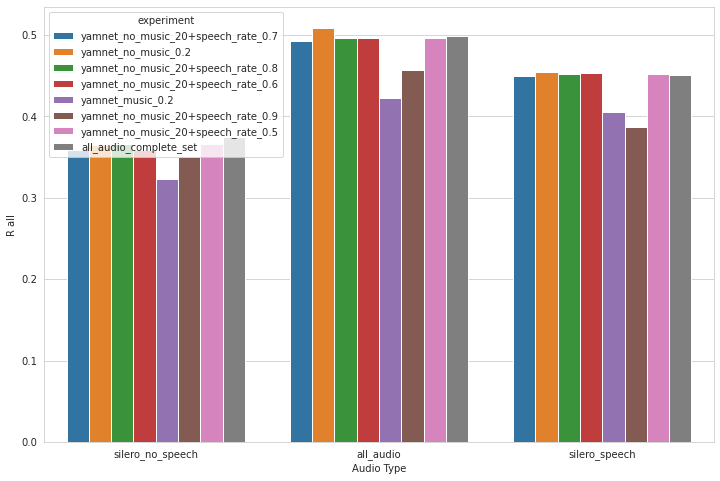

In [20]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R all')

[Text(0.5, 0, 'Data subset'), Text(0, 0.5, 'R all')]

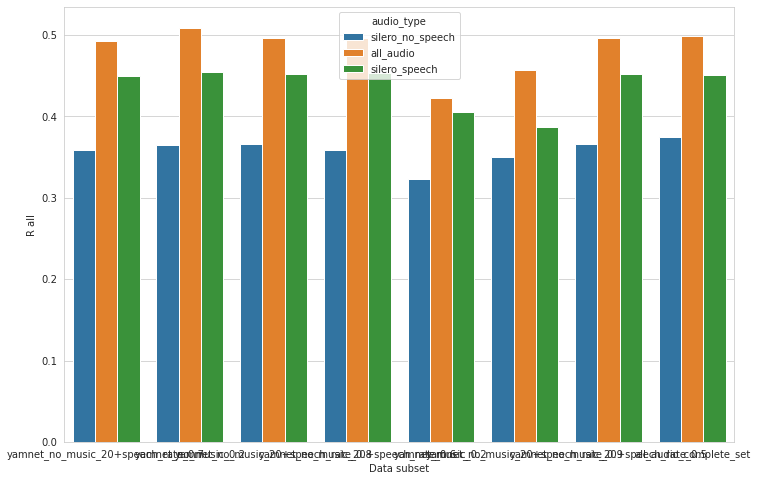

In [21]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="all", hue="audio_type", data=r_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='R all')

### Openness

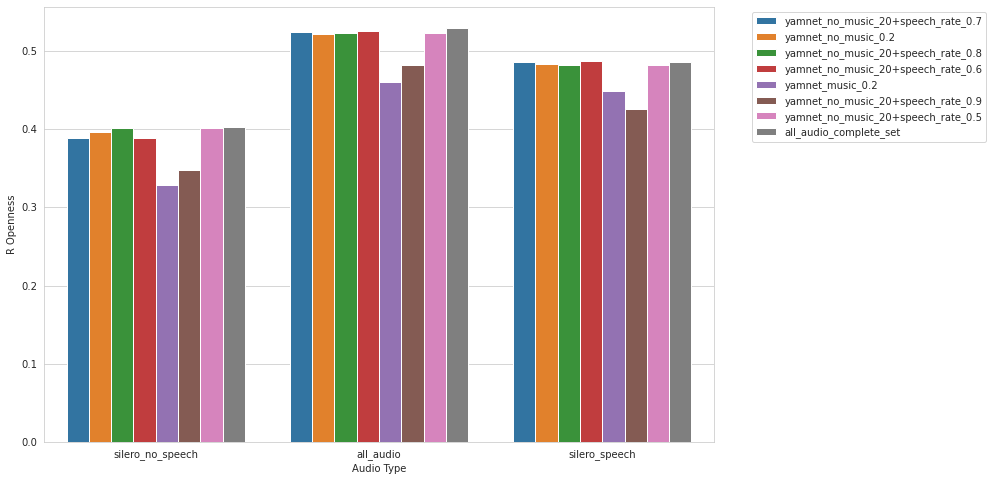

In [22]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Openness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

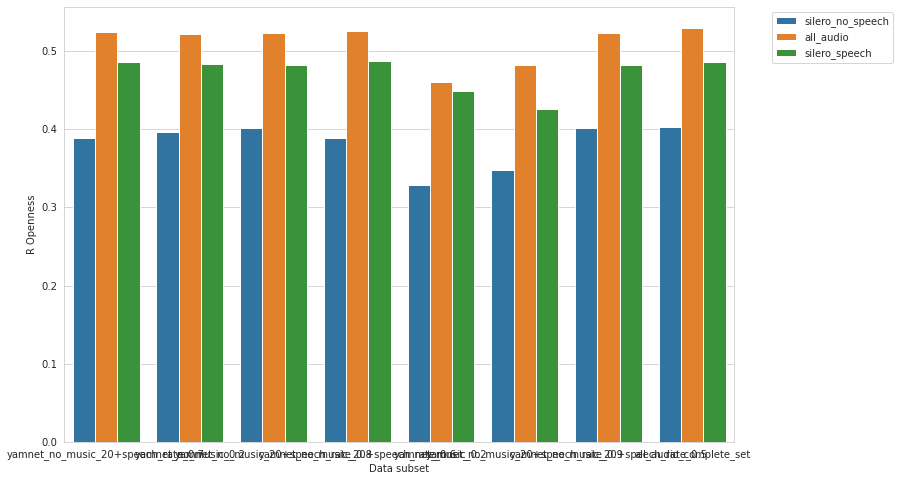

In [23]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="O", hue="audio_type", data=r_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='R Openness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Conscienciousness

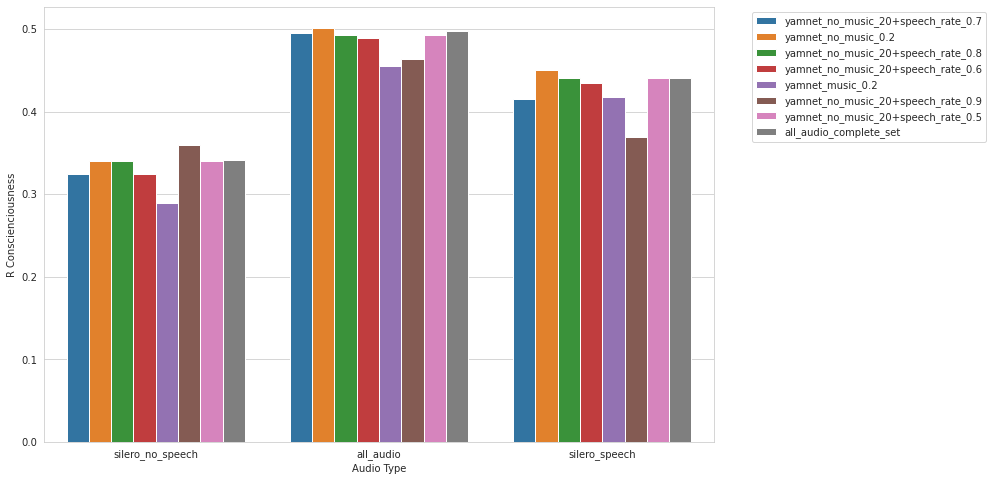

In [24]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Conscienciousness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

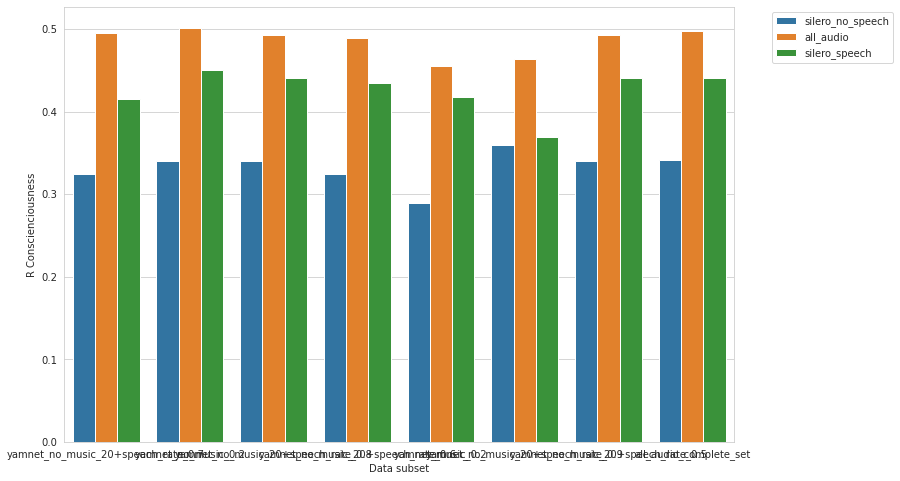

In [25]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="C", hue="audio_type", data=r_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='R Conscienciousness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Extraversion

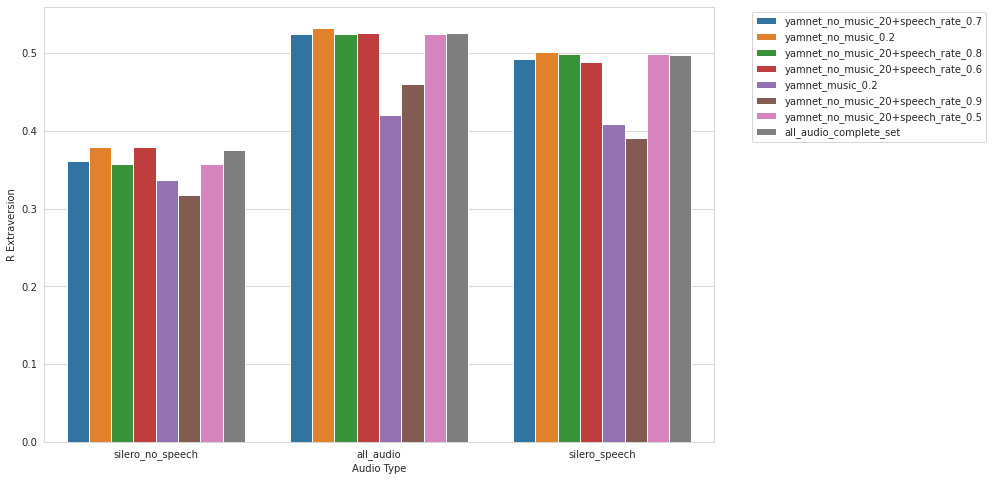

In [26]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Extraversion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

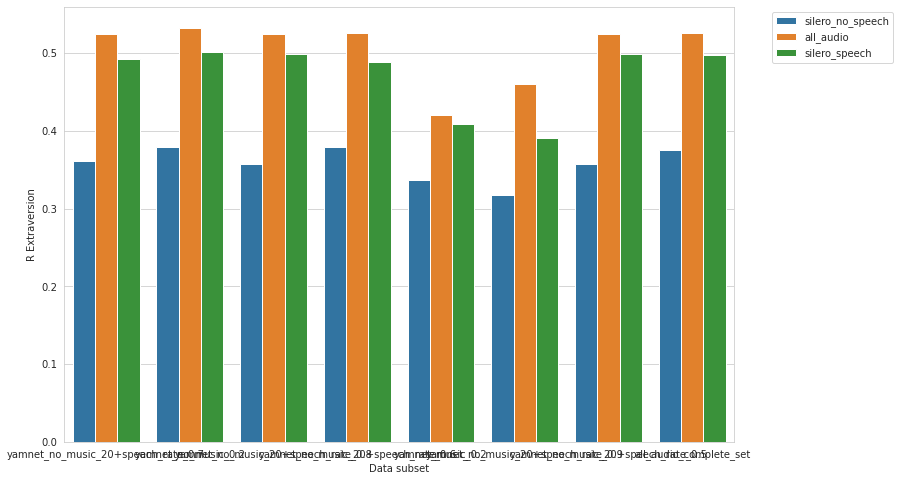

In [27]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="E", hue="audio_type", data=r_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='R Extraversion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Agreeableness

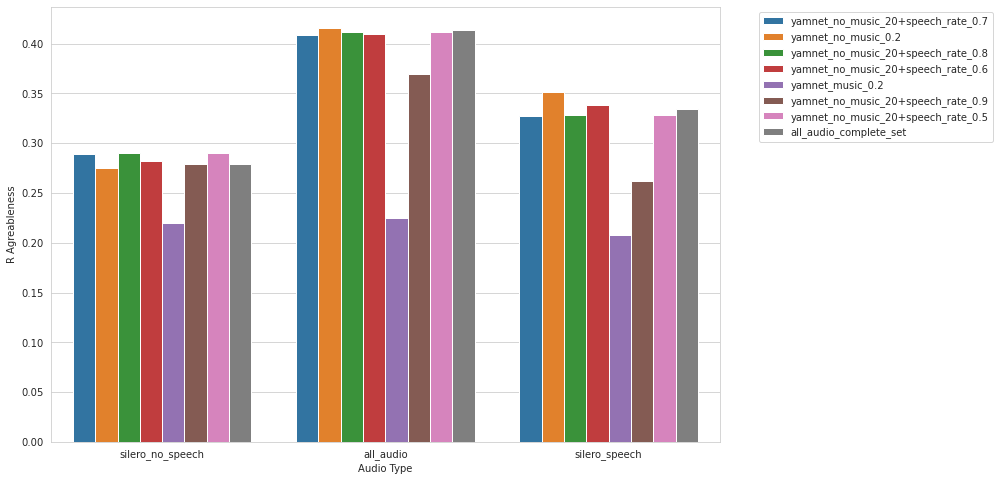

In [28]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Agreableness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

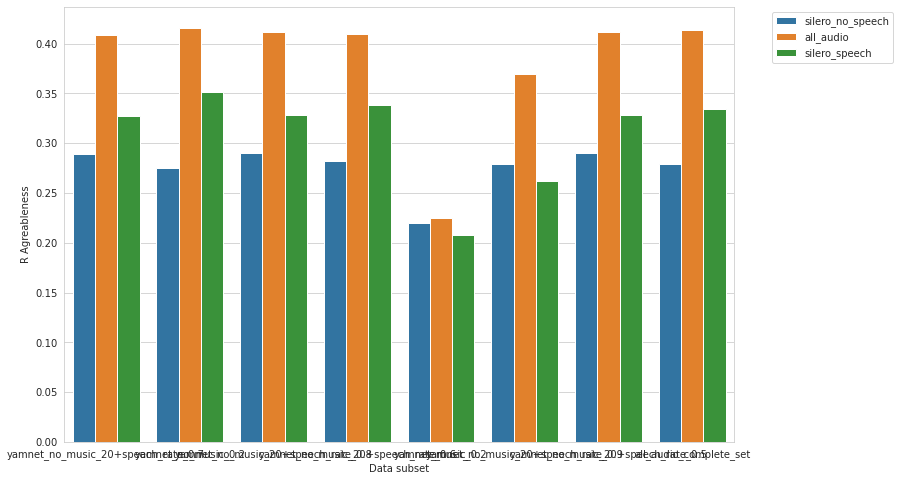

In [29]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="A", hue="audio_type", data=r_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='R Agreableness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Neuroticism

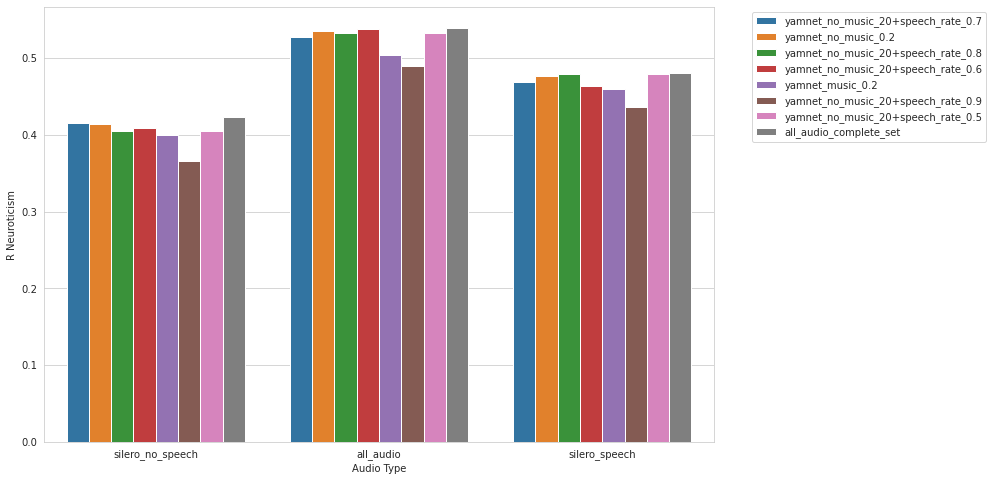

In [30]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Neuroticism')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

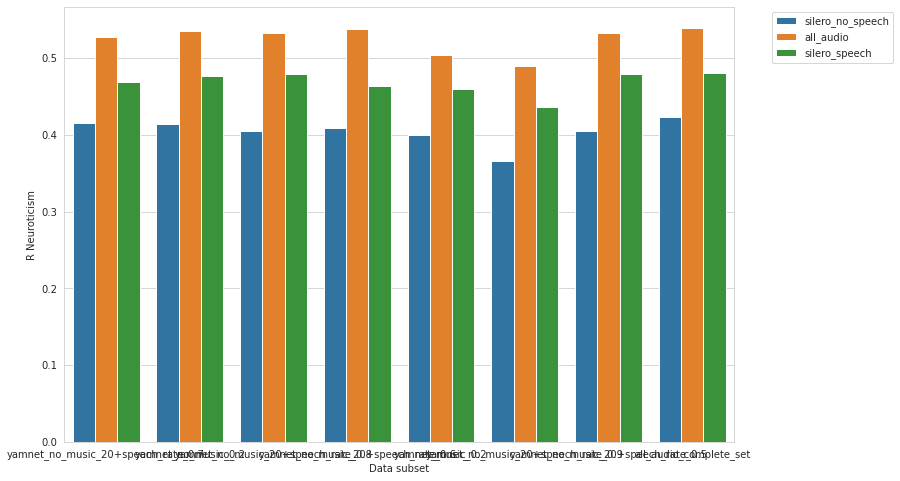

In [31]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="N", hue="audio_type", data=r_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='R Neuroticism')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## RMSE

In [32]:
RMSE=DF_performance[DF_performance['index']=='RMSE'].drop(columns='index')

RMSE_all=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','A','N'])]
RMSE_O=RMSE.loc[:,~RMSE.columns.isin(['all','C','E','A','N'])]
RMSE_C=RMSE.loc[:,~RMSE.columns.isin(['O','all','E','A','N'])]
RMSE_E=RMSE.loc[:,~RMSE.columns.isin(['O','C','all','A','N'])]
RMSE_A=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','all','N'])]
RMSE_N=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','A','all'])]

### All

(0.12, 0.14463338658178884)

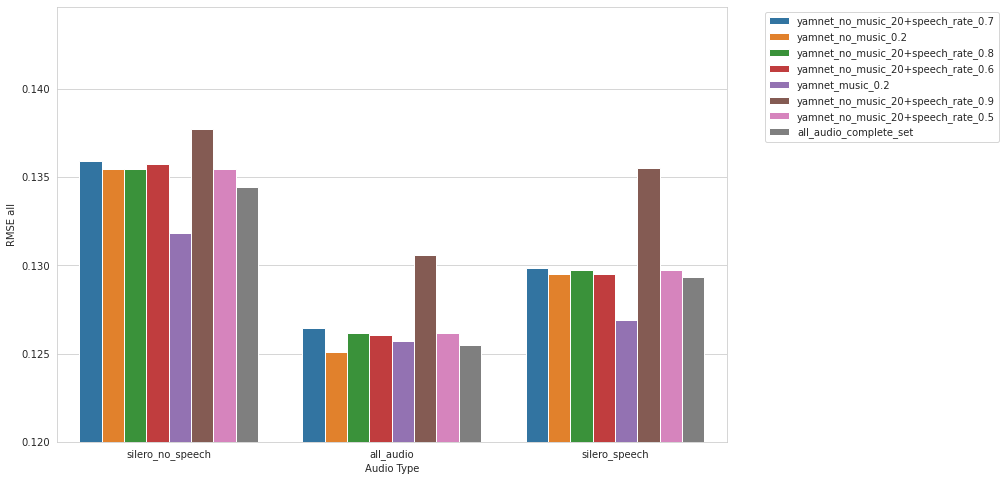

In [33]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=RMSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

(0.12, 0.14463338658178884)

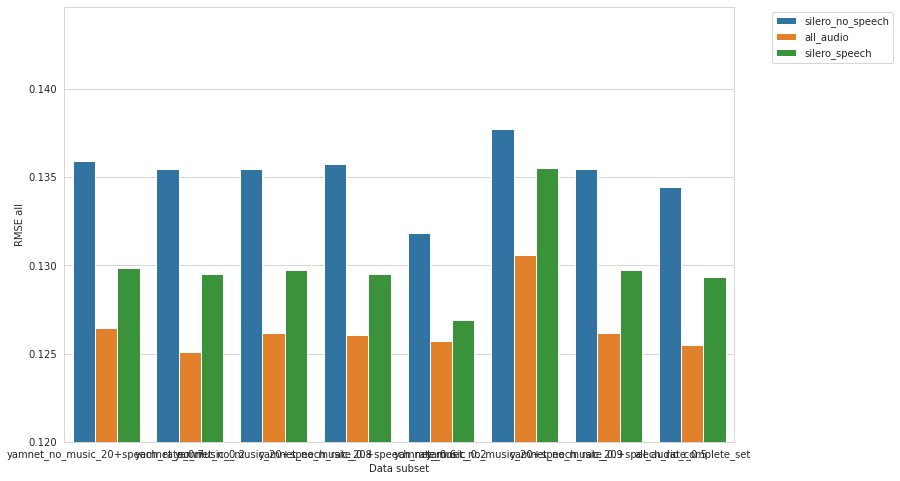

In [34]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="all", hue="audio_type", data=RMSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='RMSE all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

### Openness

(0.12, 0.1448144037342472)

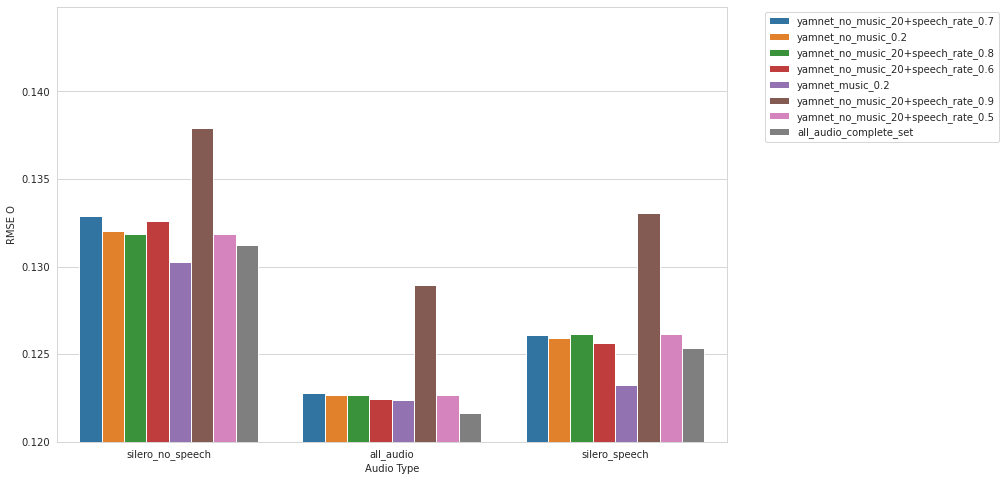

In [35]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=RMSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE O')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

(0.12, 0.1448144037342472)

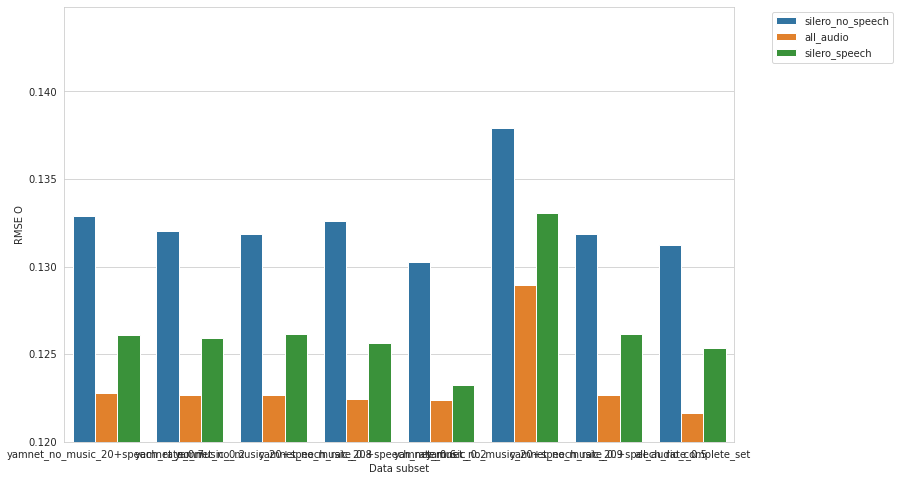

In [36]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="O", hue="audio_type", data=RMSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='RMSE O')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

### Consciencousness

(0.12, 0.15578783450071024)

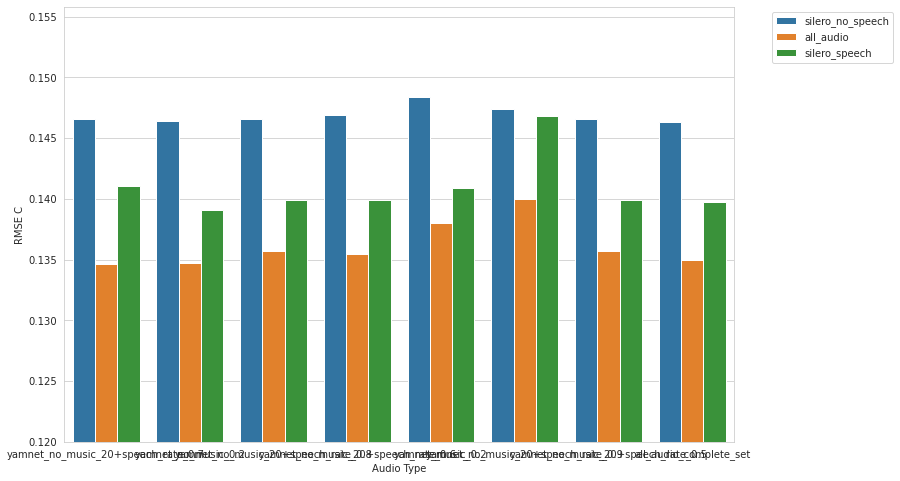

In [37]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="C", hue="audio_type", data=RMSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12, )

(0.12, 0.15578783450071024)

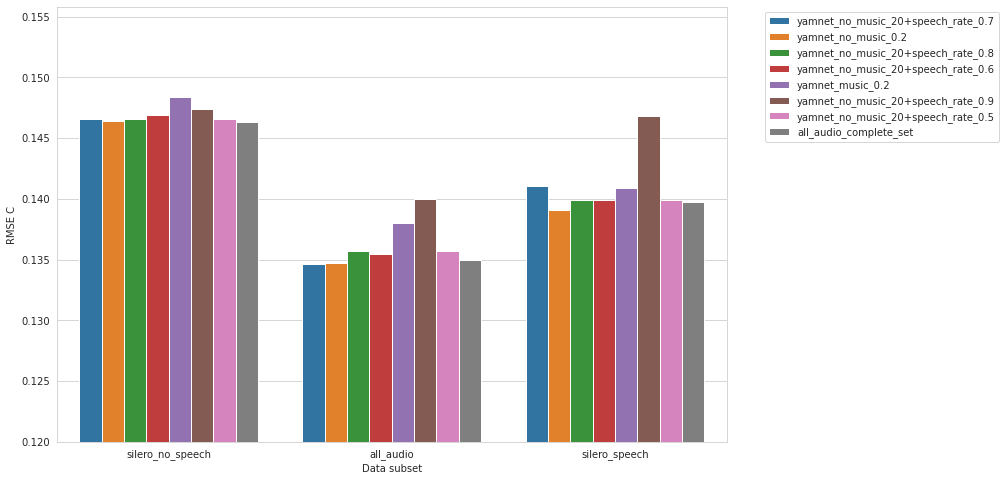

In [38]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=RMSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='RMSE C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12, )

### Extraversion

(0.12, 0.14888859362716028)

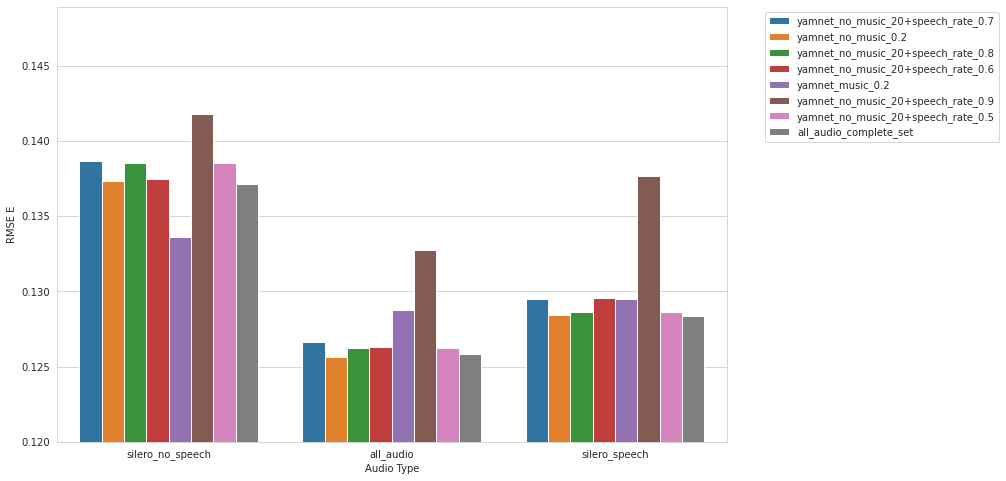

In [39]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=RMSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE E')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

(0.12, 0.14888859362716028)

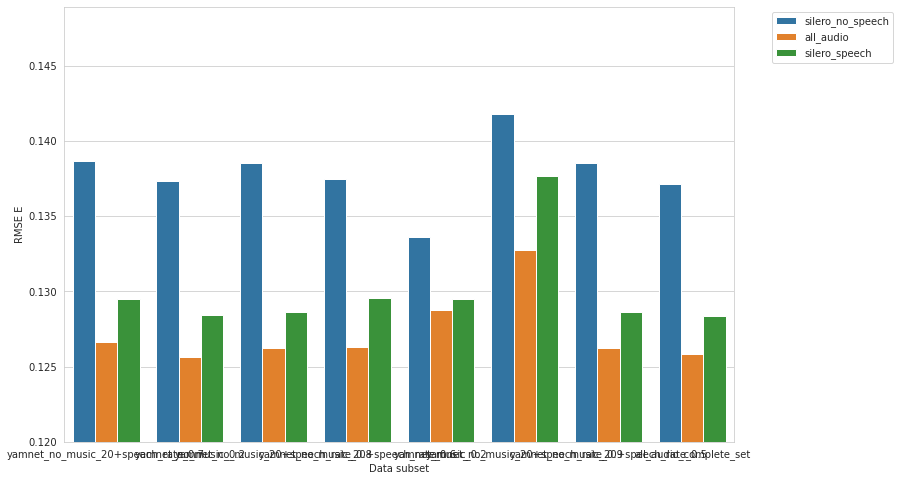

In [40]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="E", hue="audio_type", data=RMSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='RMSE E')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

### Agreeableness

(0.1, 0.13254224680295185)

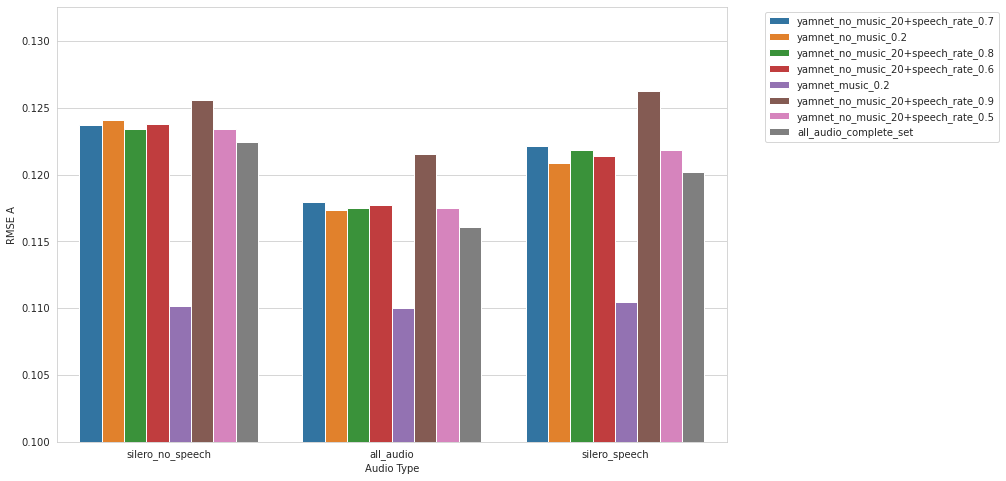

In [41]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=RMSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE A')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.1,)

(0.1, 0.13254224680295185)

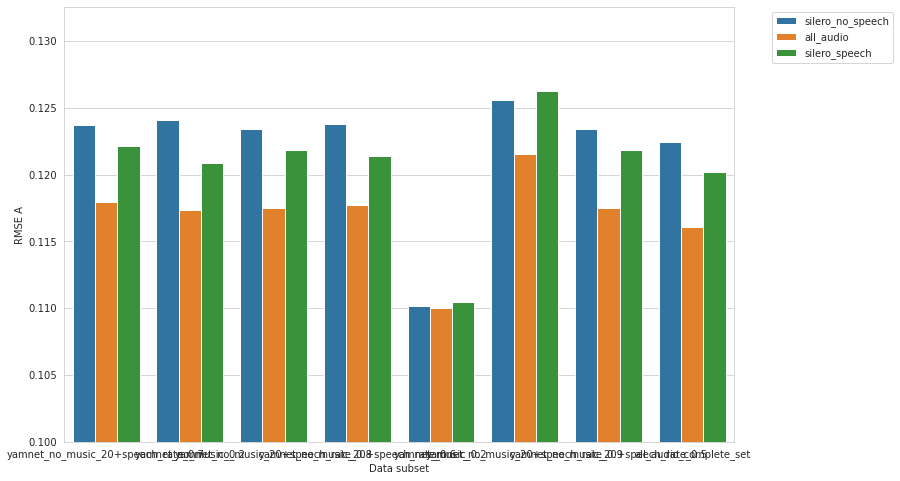

In [42]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="A", hue="audio_type", data=RMSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='RMSE A')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.1,)

### Neuroticism

(0.12, 0.14591358249433434)

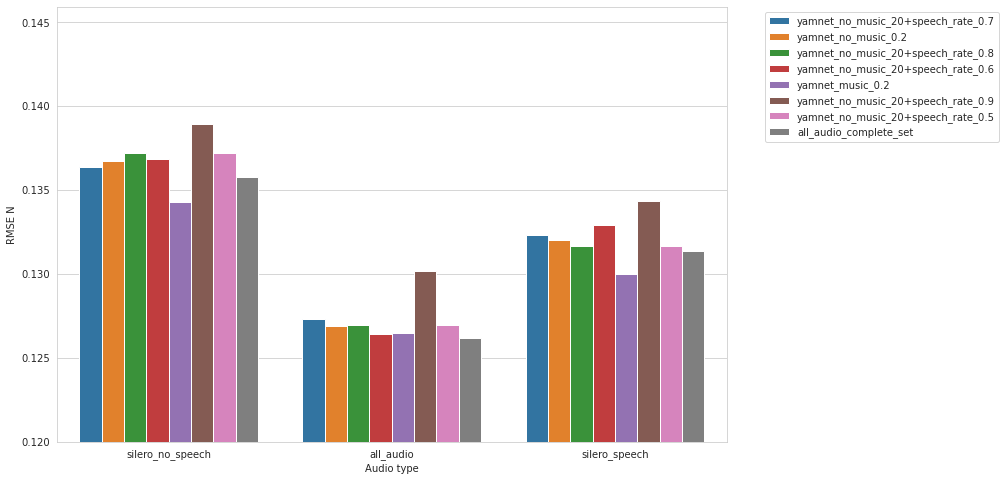

In [43]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=RMSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio type', ylabel='RMSE N')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

(0.12, 0.14591358249433434)

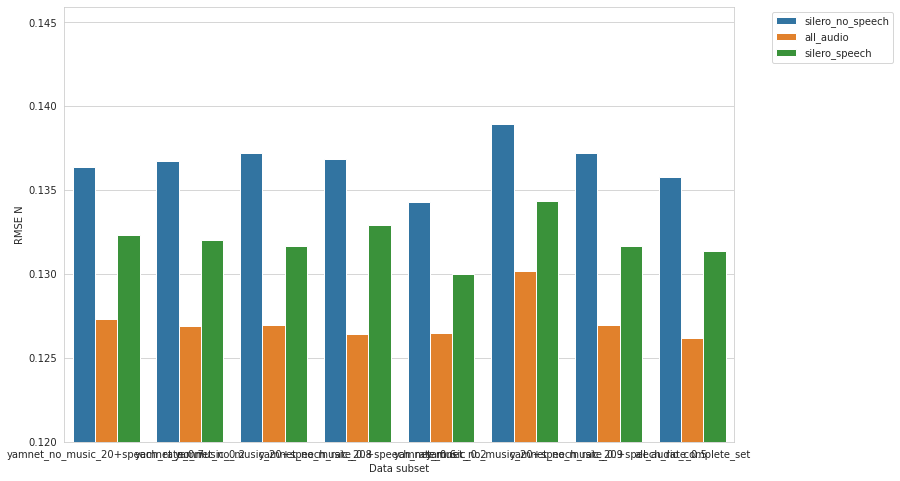

In [44]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="N", hue="audio_type", data=RMSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='RMSE N')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

## MAE

In [45]:
MAE=DF_performance[DF_performance['index']=='MAE'].drop(columns='index')

MAE_all=MAE.loc[:,~MAE.columns.isin(['O','C','E','A','N'])]
MAE_O=MAE.loc[:,~MAE.columns.isin(['all','C','E','A','N'])]
MAE_C=MAE.loc[:,~MAE.columns.isin(['O','all','E','A','N'])]
MAE_E=MAE.loc[:,~MAE.columns.isin(['O','C','all','A','N'])]
MAE_A=MAE.loc[:,~MAE.columns.isin(['O','C','E','all','N'])]
MAE_N=MAE.loc[:,~MAE.columns.isin(['O','C','E','A','all'])]

### All

(0.08, 0.11532568883361739)

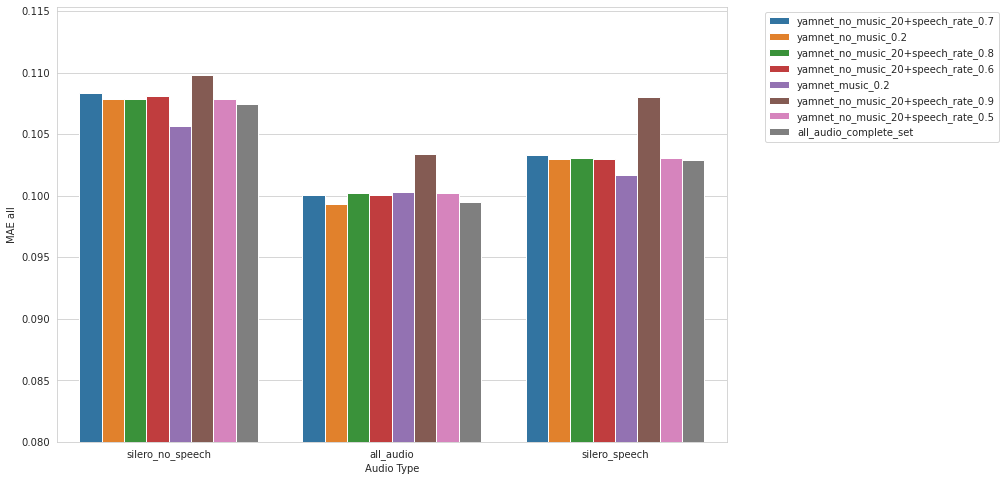

In [46]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=MAE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08, )

(0.08, 0.11532568883361739)

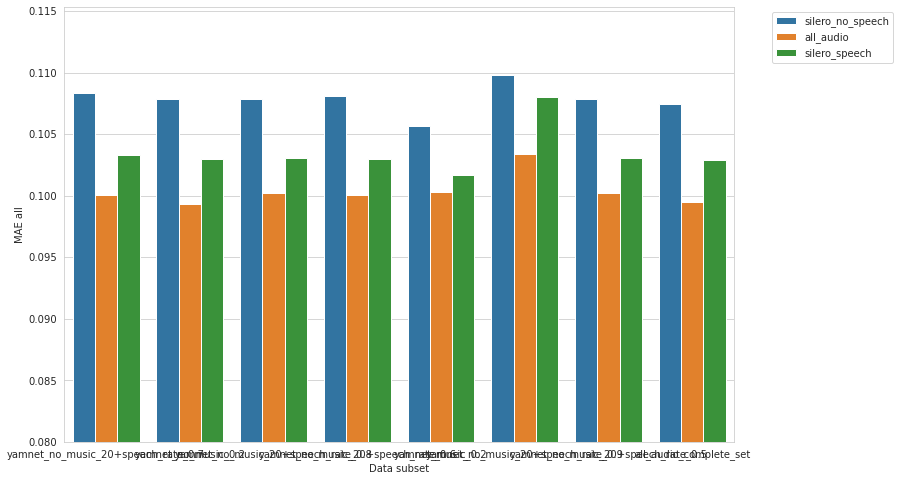

In [47]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="all", hue="audio_type", data=MAE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MAE all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08, )

### Openness

(0.08, 0.11595001787228884)

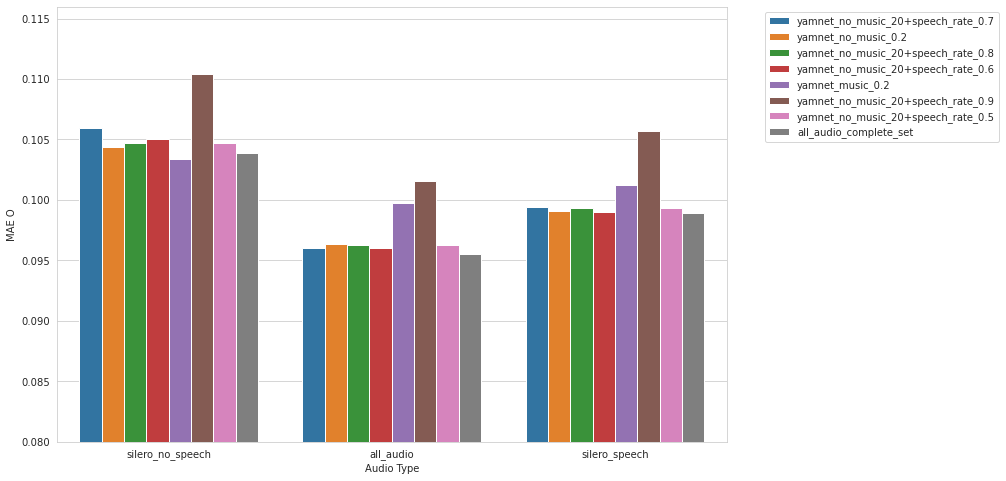

In [48]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=MAE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE O')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

(0.08, 0.11595001787228884)

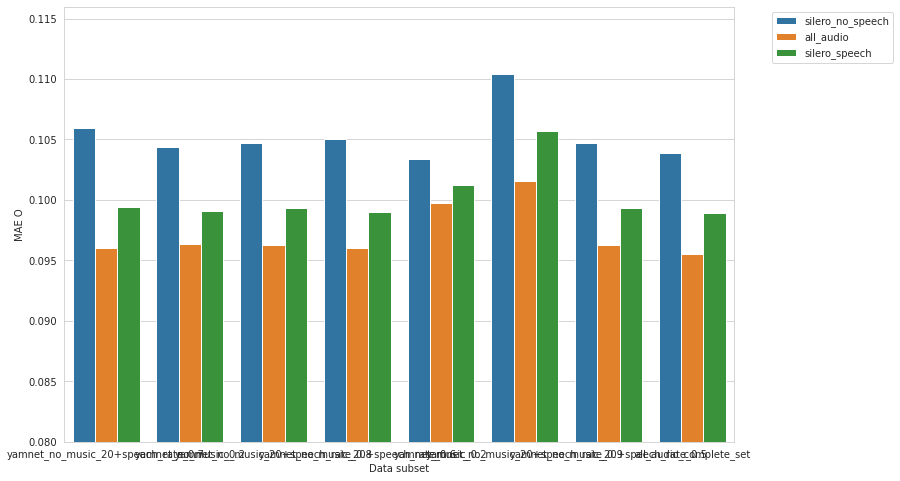

In [49]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="O", hue="audio_type", data=MAE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MAE O')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Conscienciousness

(0.08, 0.12450511363034798)

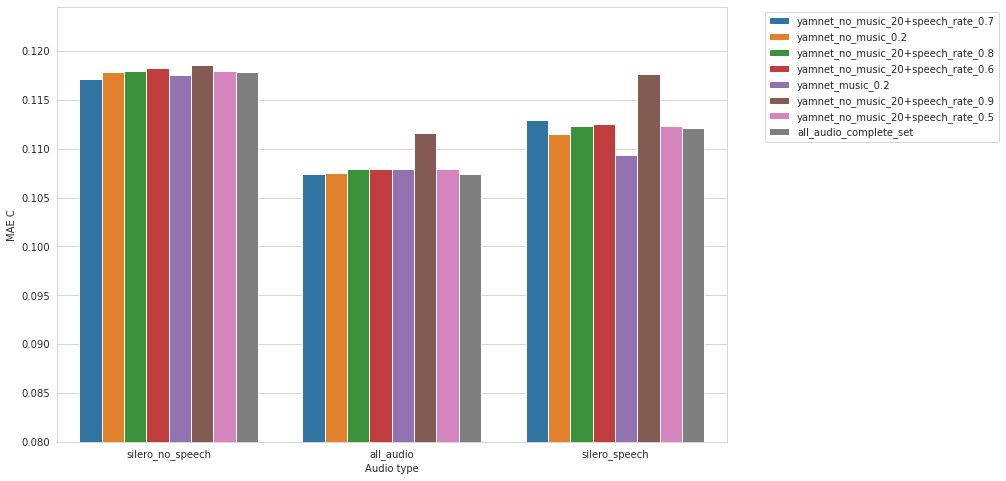

In [50]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=MAE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio type', ylabel='MAE C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

(0.08, 0.12450511363034798)

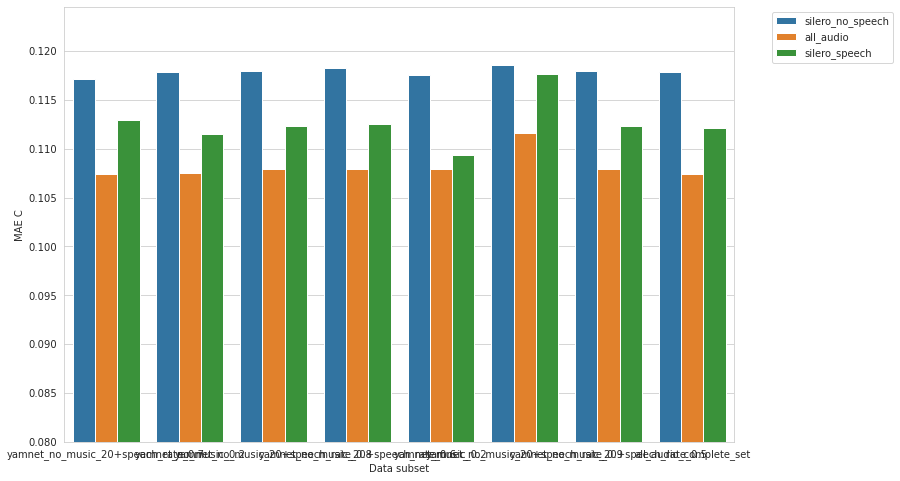

In [51]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="C", hue="audio_type", data=MAE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MAE C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Extraversion

(0.08, 0.1190922973634057)

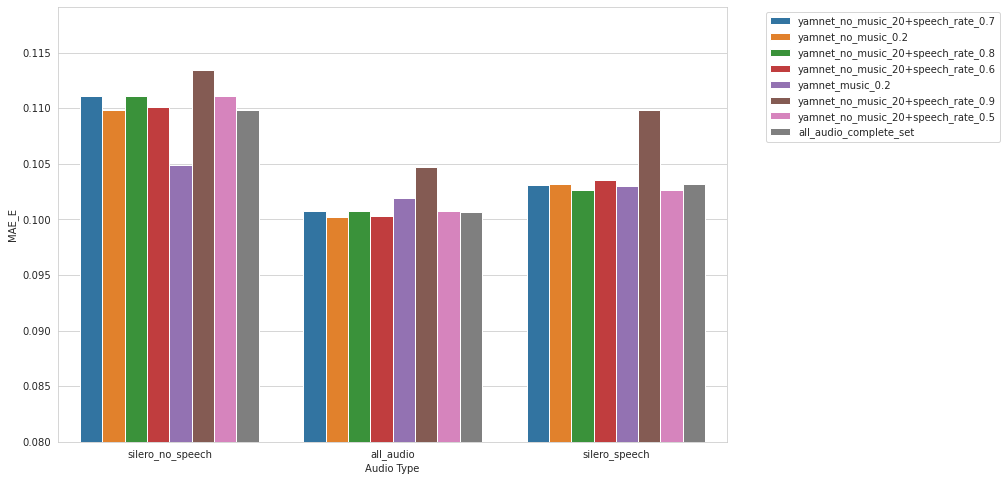

In [52]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=MAE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE_E')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

(0.08, 0.1190922973634057)

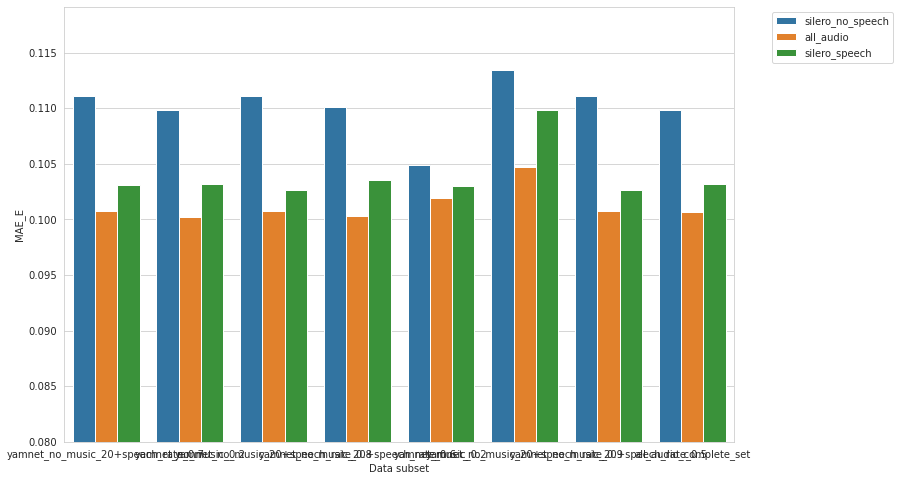

In [53]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="E", hue="audio_type", data=MAE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MAE_E')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Agreeableness

(0.08, 0.10502164247965771)

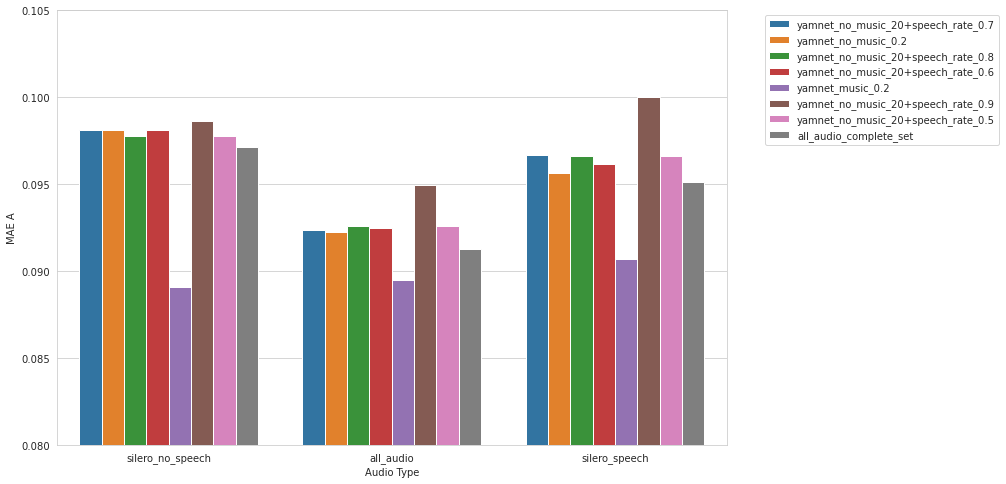

In [54]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=MAE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE A')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

(0.08, 0.10502164247965771)

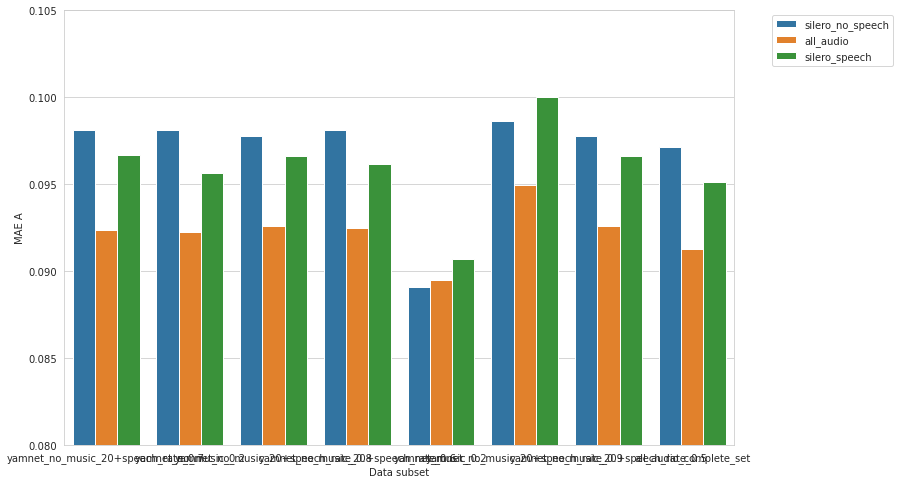

In [55]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="A", hue="audio_type", data=MAE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MAE A')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Neuroticism

(0.08, 0.11734801095056341)

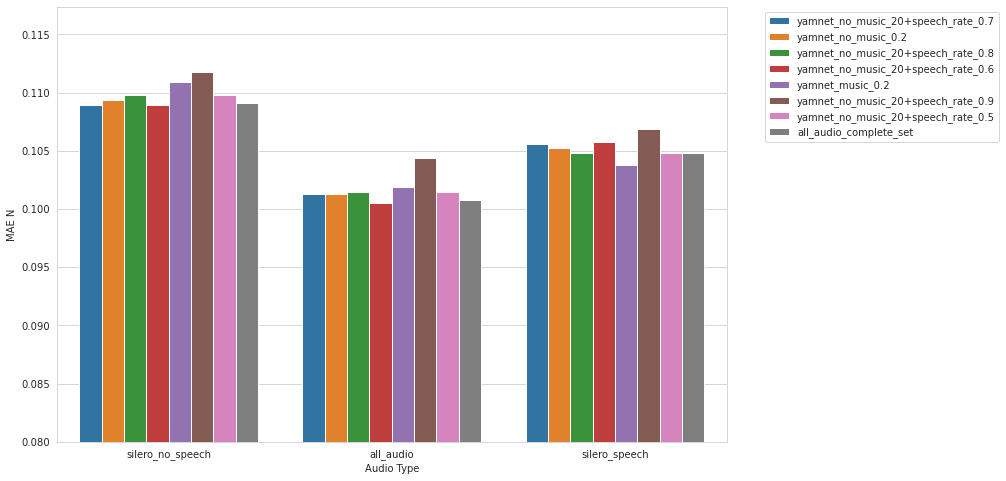

In [56]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=MAE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE N')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08, )

(0.08, 0.11734801095056341)

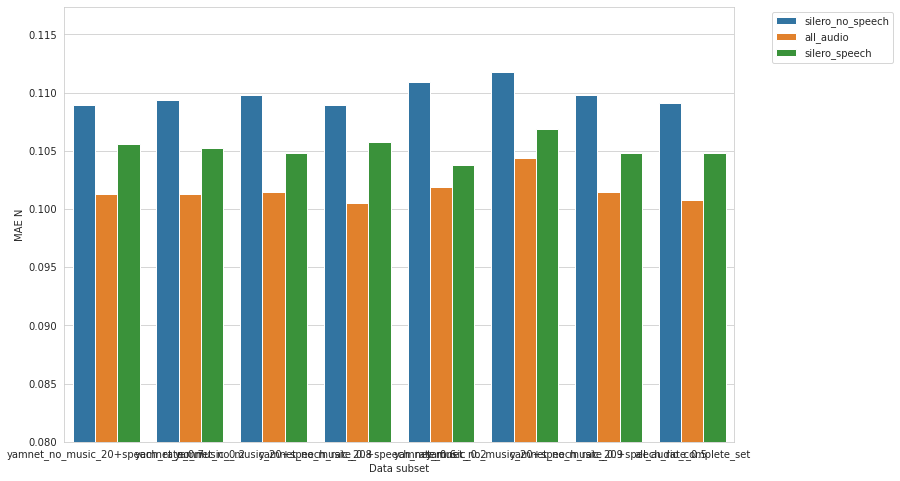

In [57]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x='experiment', y="N", hue="audio_type", data=MAE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MAE N')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08, )

## MSE

In [58]:
MSE=DF_performance[DF_performance['index']=='MSE'].drop(columns='index')

MSE_all=MSE.loc[:,~MSE.columns.isin(['O','C','E','A','N'])]
MSE_O=MSE.loc[:,~MSE.columns.isin(['all','C','E','A','N'])]
MSE_C=MSE.loc[:,~MSE.columns.isin(['O','all','E','A','N'])]
MSE_E=MSE.loc[:,~MSE.columns.isin(['O','C','all','A','N'])]
MSE_A=MSE.loc[:,~MSE.columns.isin(['O','C','E','all','N'])]
MSE_N=MSE.loc[:,~MSE.columns.isin(['O','C','E','A','all'])]

### All

(0.01, 0.019922682394397265)

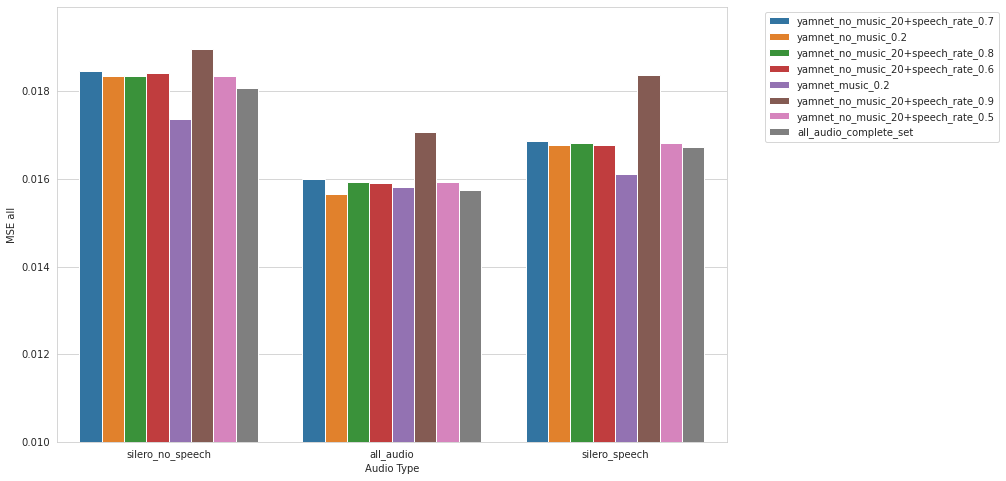

In [59]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=MSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

(0.01, 0.019922682394397265)

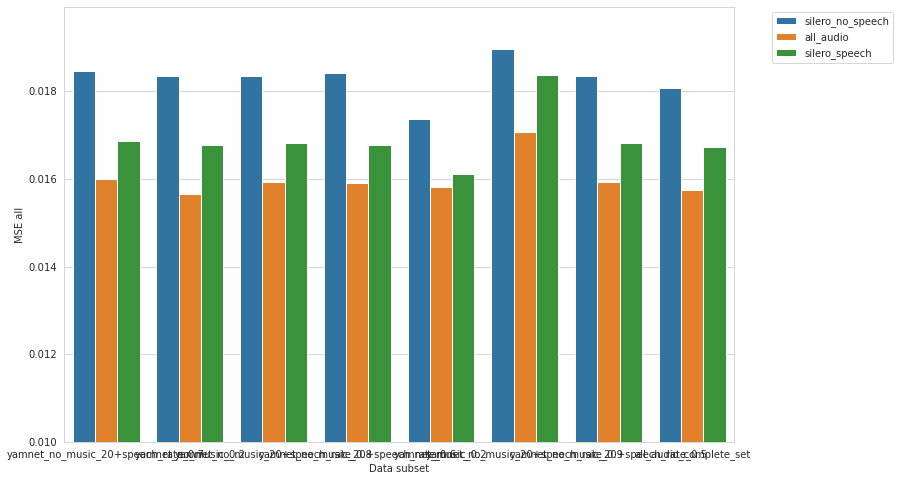

In [60]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="all", hue="audio_type", data=MSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MSE all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Openness

(0.01, 0.019972582408481432)

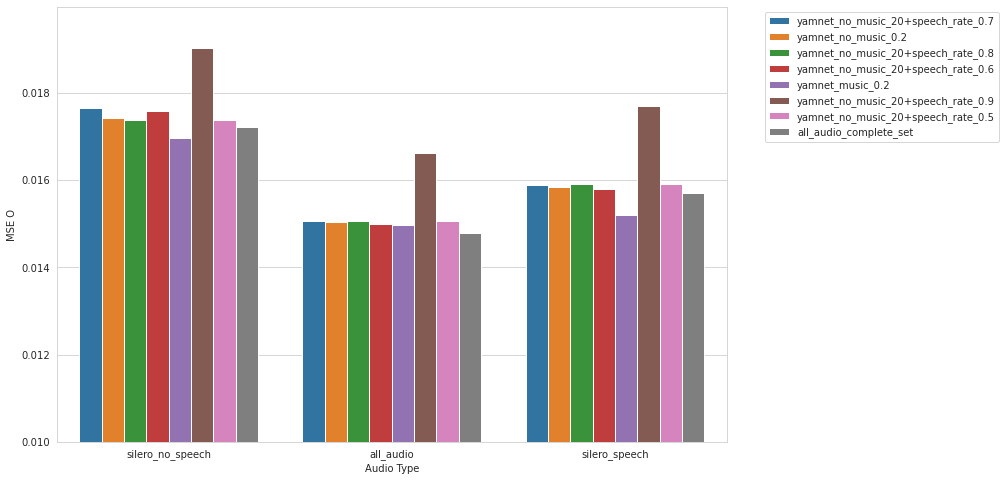

In [61]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=MSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE O')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

(0.01, 0.019972582408481432)

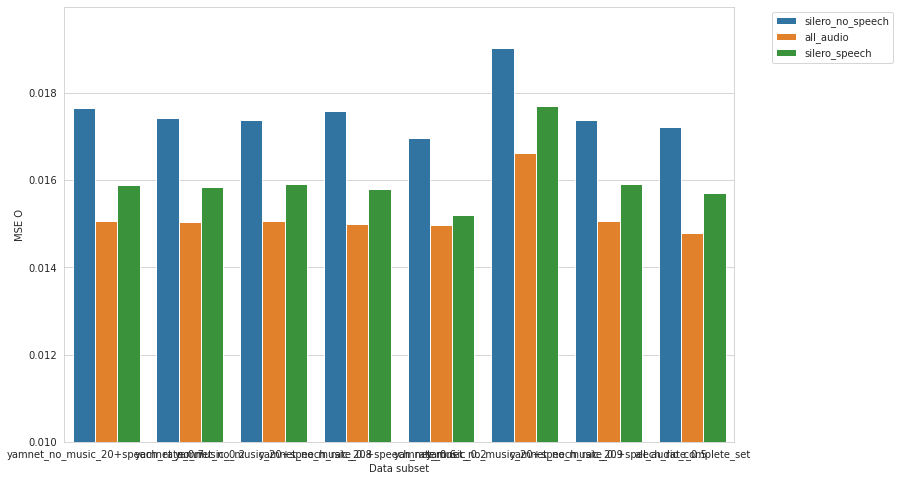

In [62]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="O", hue="audio_type", data=MSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MSE O')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Conscienciousness

(0.01, 0.023114142265162514)

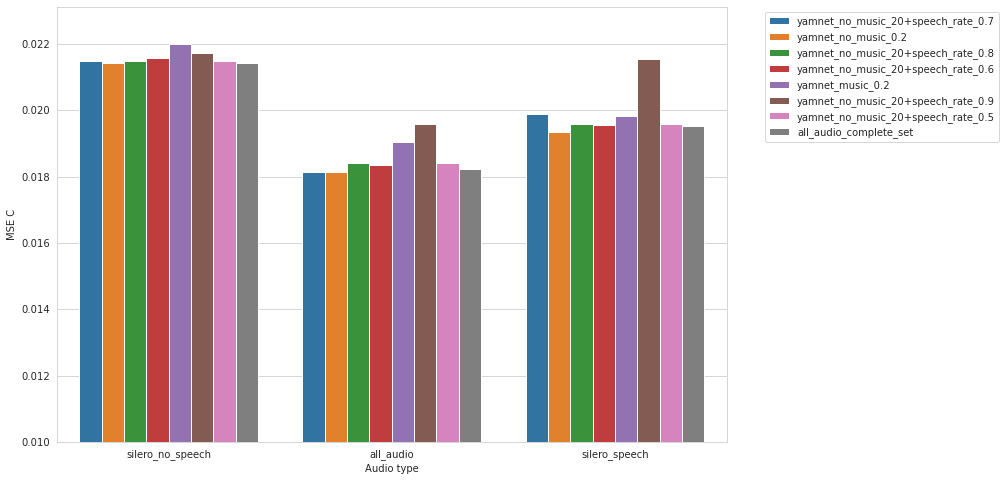

In [63]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=MSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio type', ylabel='MSE C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

(0.01, 0.023114142265162514)

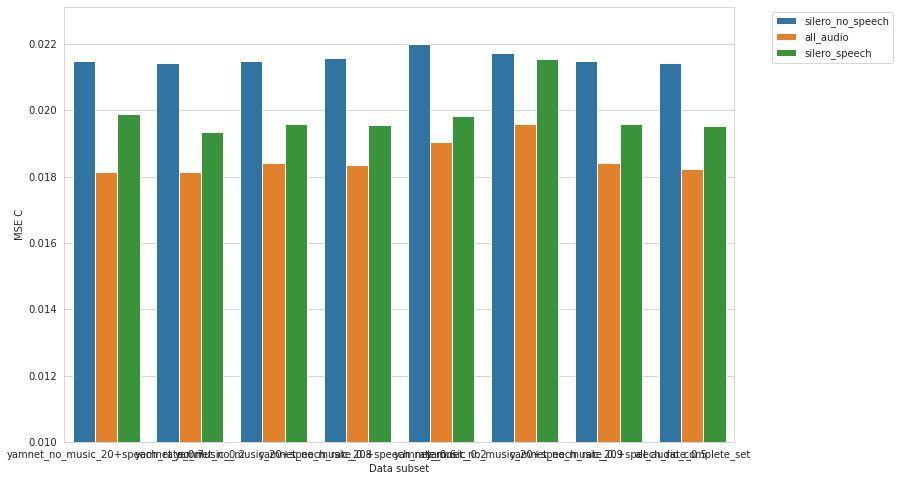

In [64]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="C", hue="audio_type", data=MSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MSE C')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Extraversion

(0.01, 0.02111220315454635)

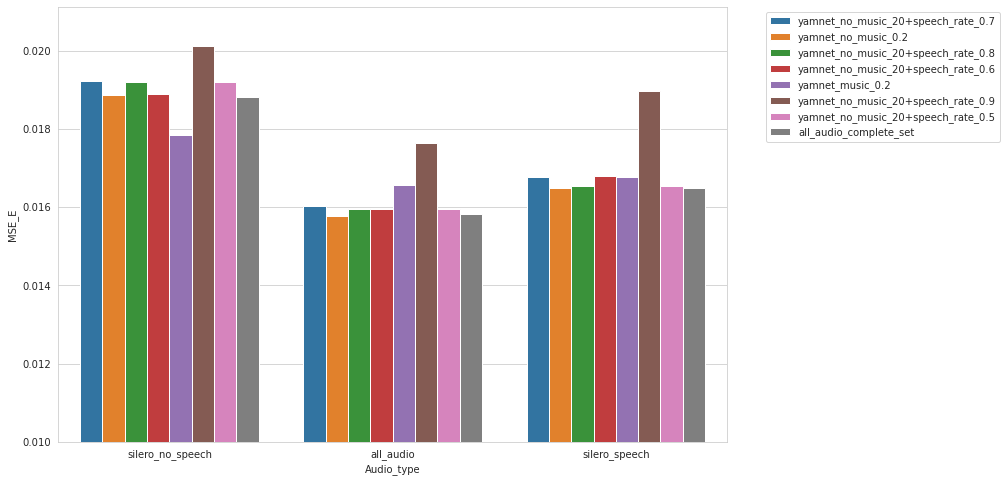

In [65]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=MSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio_type', ylabel='MSE_E')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

(0.01, 0.02111220315454635)

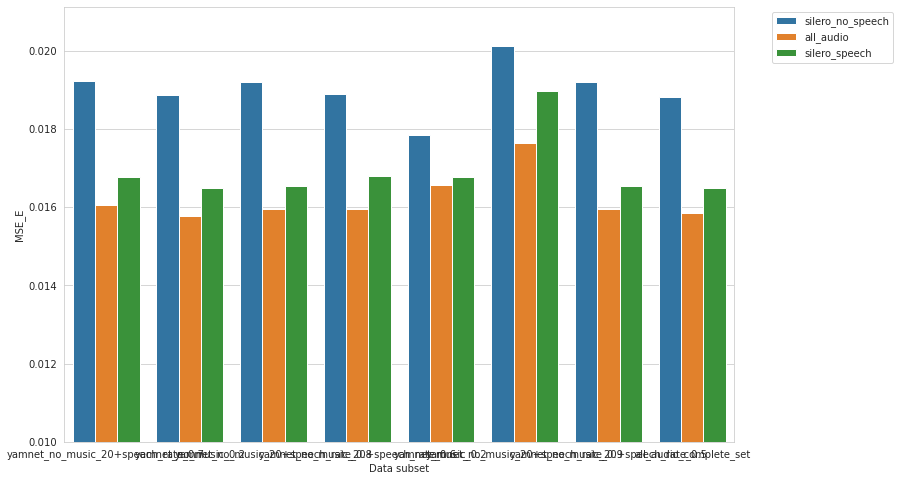

In [66]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="E", hue="audio_type", data=MSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MSE_E')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Agreeableness

(0.01, 0.016730902083404355)

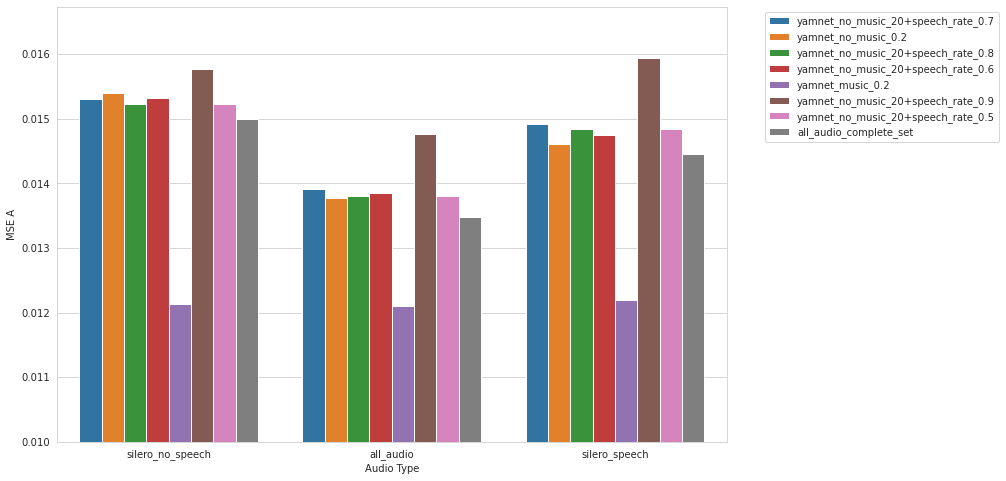

In [67]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=MSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE A')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

(0.01, 0.016730902083404355)

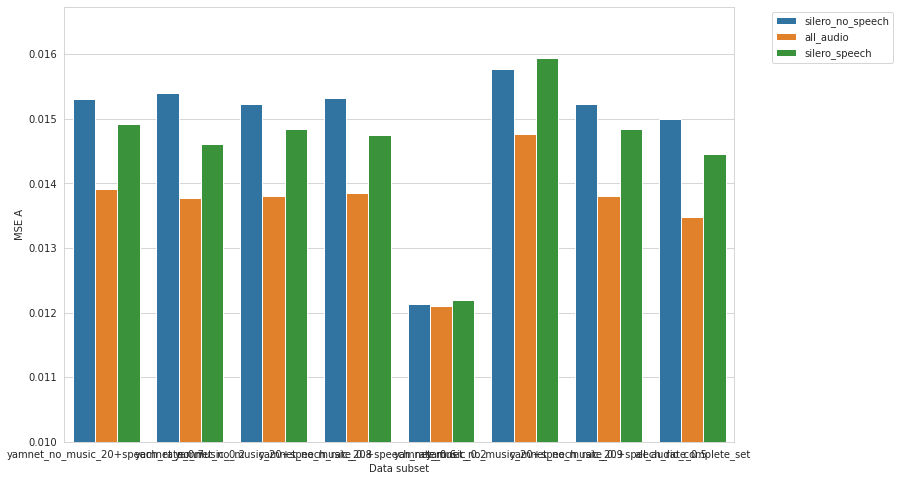

In [68]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="A", hue="audio_type", data=MSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MSE A')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Neuroticism

(0.01, 0.02027692719650556)

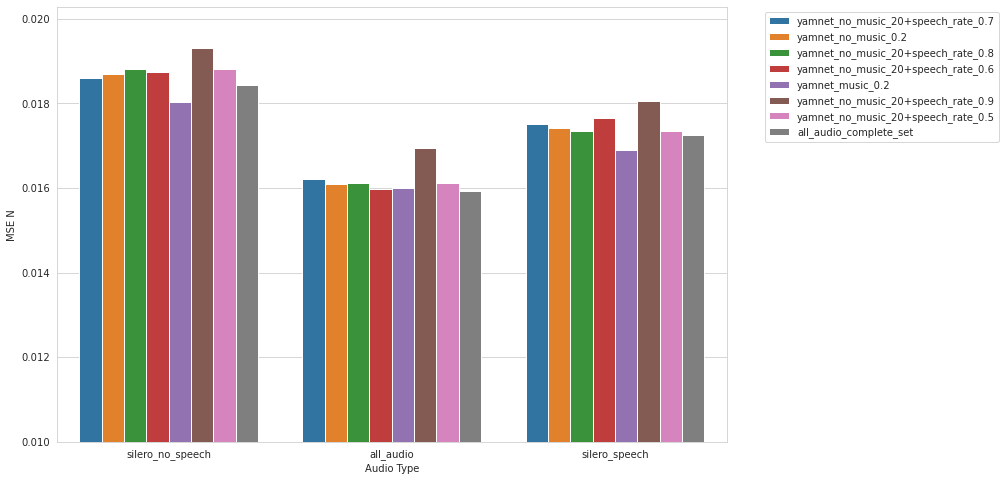

In [69]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=MSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE N')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

(0.01, 0.02027692719650556)

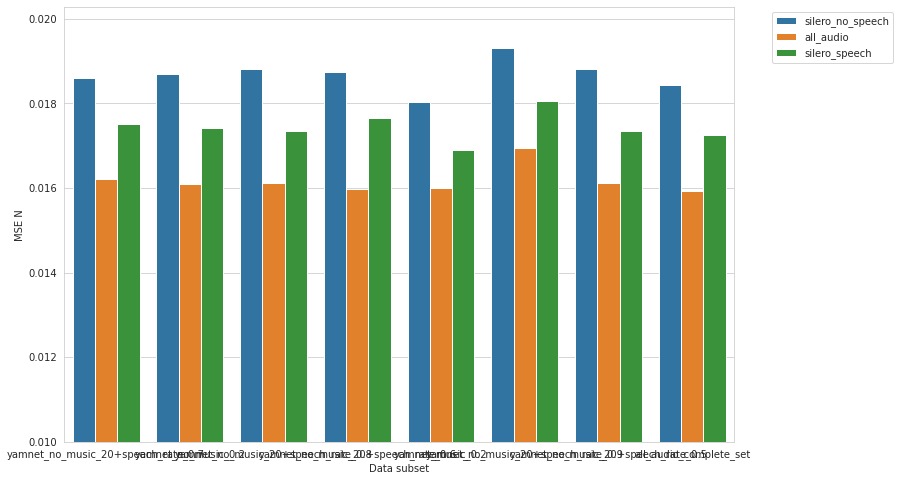

In [70]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="experiment", y="N", hue="audio_type", data=MSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Data subset', ylabel='MSE N')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

# Relevant features

In [71]:
DF_relevant_features

,Unnamed: 0,features,Personality,Importance,audio_type,experiment
0,10,loudness_sma3_amean,O,0.029423,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
1,13,loudness_sma3_percentile50.0,O,0.032986,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
2,14,loudness_sma3_percentile80.0,O,0.038697,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
3,23,mfcc1_sma3_stddevNorm,O,0.025526,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
4,85,MeanUnvoicedSegmentLength,O,0.087132,silero_no_speech,yamnet_no_music_20+speech_rate_0.7
...,...,...,...,...,...,...
18,354,StddevUnvoicedSegmentLength,A,0.027568,all_audio,all_audio_complete_set
19,369,loudness_sma3_percentile20.0,N,0.082032,all_audio,all_audio_complete_set
20,438,loudnessPeaksPerSec,N,0.027482,all_audio,all_audio_complete_set
21,442,MeanUnvoicedSegmentLength,N,0.059312,all_audio,all_audio_complete_set


In [72]:
DF_O=DF_relevant_features[DF_relevant_features['Personality']=='O']
DF_C=DF_relevant_features[DF_relevant_features['Personality']=='C']
DF_E=DF_relevant_features[DF_relevant_features['Personality']=='E']
DF_A=DF_relevant_features[DF_relevant_features['Personality']=='A']
DF_N=DF_relevant_features[DF_relevant_features['Personality']=='N']

List of top ten features in every experiment, for each personality trait

In [73]:
features_O=DF_O.drop_duplicates('features').features.values
features_C=DF_C.drop_duplicates('features').features.values
features_E=DF_E.drop_duplicates('features').features.values
features_A=DF_A.drop_duplicates('features').features.values
features_N=DF_N.drop_duplicates('features').features.values

Feature count 

In [74]:
DF_features_O=pd.DataFrame(columns=['O'])
DF_features_C=pd.DataFrame(columns=['C'])
DF_features_E=pd.DataFrame(columns=['E'])
DF_features_A=pd.DataFrame(columns=['A'])
DF_features_N=pd.DataFrame(columns=['N'])

for (f_O,f_C,f_E,f_A,f_N) in zip(features_O,features_C,features_E,features_A,features_N):
    DF_features_O.loc[f_O]=DF_O[DF_O['features']==f_O].shape[0]
    DF_features_C.loc[f_C]=DF_C[DF_C['features']==f_C].shape[0]
    DF_features_E.loc[f_E]=DF_E[DF_E['features']==f_E].shape[0]
    DF_features_A.loc[f_A]=DF_A[DF_A['features']==f_A].shape[0]
    DF_features_N.loc[f_N]=DF_N[DF_N['features']==f_N].shape[0]

DF_features_O=DF_features_O.sort_values(by='O',ascending=False).reset_index()
DF_features_C=DF_features_C.sort_values(by='C',ascending=False).reset_index()
DF_features_E=DF_features_E.sort_values(by='E',ascending=False).reset_index()
DF_features_A=DF_features_A.sort_values(by='A',ascending=False).reset_index()
DF_features_N=DF_features_N.sort_values(by='N',ascending=False).reset_index()

In [75]:
from functools import reduce 

OCEAN=[DF_features_O,DF_features_C,DF_features_E,DF_features_A,DF_features_N]

features_freq_DF = reduce(lambda left, right:
                     pd.merge(left , right,
                              on = ['index'],
                              how='outer'),
                     OCEAN)

Feature count for every relevant features and personality traits 

In [76]:
features_freq_DF

,index,O,C,E,A,N
0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,45.0,NaN,50.0,NaN,1.0
1,loudness_sma3_meanRisingSlope,33.0,29.0,38.0,40.0,40.0
2,loudness_sma3_stddevRisingSlope,31.0,1.0,30.0,4.0,11.0
3,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,27.0,NaN,32.0,NaN,NaN
4,MeanUnvoicedSegmentLength,22.0,28.0,19.0,20.0,22.0
5,loudness_sma3_percentile20.0,22.0,7.0,20.0,7.0,23.0
6,slopeUV500-1500_sma3nz_amean,19.0,58.0,13.0,8.0,8.0
7,F0semitoneFrom27.5Hz_sma3nz_amean,19.0,NaN,14.0,NaN,NaN
8,StddevUnvoicedSegmentLength,12.0,22.0,11.0,20.0,22.0
9,hammarbergIndexV_sma3nz_stddevNorm,12.0,5.0,9.0,5.0,15.0


Relevant features in every personality trait 

In [77]:
features_freq_DF.dropna()

,index,O,C,E,A,N
1,loudness_sma3_meanRisingSlope,33.0,29.0,38.0,40.0,40.0
2,loudness_sma3_stddevRisingSlope,31.0,1.0,30.0,4.0,11.0
4,MeanUnvoicedSegmentLength,22.0,28.0,19.0,20.0,22.0
5,loudness_sma3_percentile20.0,22.0,7.0,20.0,7.0,23.0
6,slopeUV500-1500_sma3nz_amean,19.0,58.0,13.0,8.0,8.0
8,StddevUnvoicedSegmentLength,12.0,22.0,11.0,20.0,22.0
9,hammarbergIndexV_sma3nz_stddevNorm,12.0,5.0,9.0,5.0,15.0
16,loudnessPeaksPerSec,4.0,25.0,1.0,27.0,27.0
21,loudness_sma3_meanFallingSlope,2.0,7.0,7.0,15.0,14.0
